In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
df = pd.read_csv(r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\cleaned_selected_data.csv", parse_dates=['Date'], index_col='Date')

In [3]:
df.head()

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,...,Ontario_Emigrants_International_Change_Rate,Ontario_In_migrant_Interprovincial_Change_Rate,Ontario_Out_migrant_Interprovincial_Change_Rate,UT_Graduate_Enrolment_Change_Rate,UT_Undergraduate_Enrolment_Change_Rate,Ryerson_Total_Enrolment_Change_Rate,York_Total_Enrolment_Change_Rate,Toronto_population_Change_Rate,Sales_Total_Change_Rate,Avg_Price_Month_Change_Rate
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.502559,7.400,2.800000,33393.91068,262.1820,2641.687163,265.296667,34801.00000,3144.000000,15176.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-01,1.521981,7.250,3.274302,33414.60595,258.2500,2474.819966,261.310800,37662.09142,2596.931225,17272.33196,...,-0.174004,0.138135,0.054456,0.0,0.0,0.0,0.0,0.002472,0.386364,0.022788
2001-03-01,1.557832,6.750,3.523191,33421.15412,250.7975,1999.363187,262.573929,39796.62476,2862.309003,19017.66529,...,0.102189,0.101048,0.098702,0.0,0.0,0.0,0.0,0.002166,0.263661,0.007819
2001-04-01,1.558629,6.625,3.600000,33411.95797,247.6000,1929.581512,260.073810,41662.00000,3997.000000,20786.00000,...,0.396425,0.092984,0.151916,0.0,0.0,0.0,0.0,0.002325,-0.096216,-0.008740
2001-05-01,1.541287,6.450,3.475476,33549.86515,254.8020,2178.740467,271.755600,42969.07156,5936.427697,22333.20337,...,0.485221,0.074435,0.173189,0.0,0.0,0.0,0.0,0.002177,0.145933,0.009777


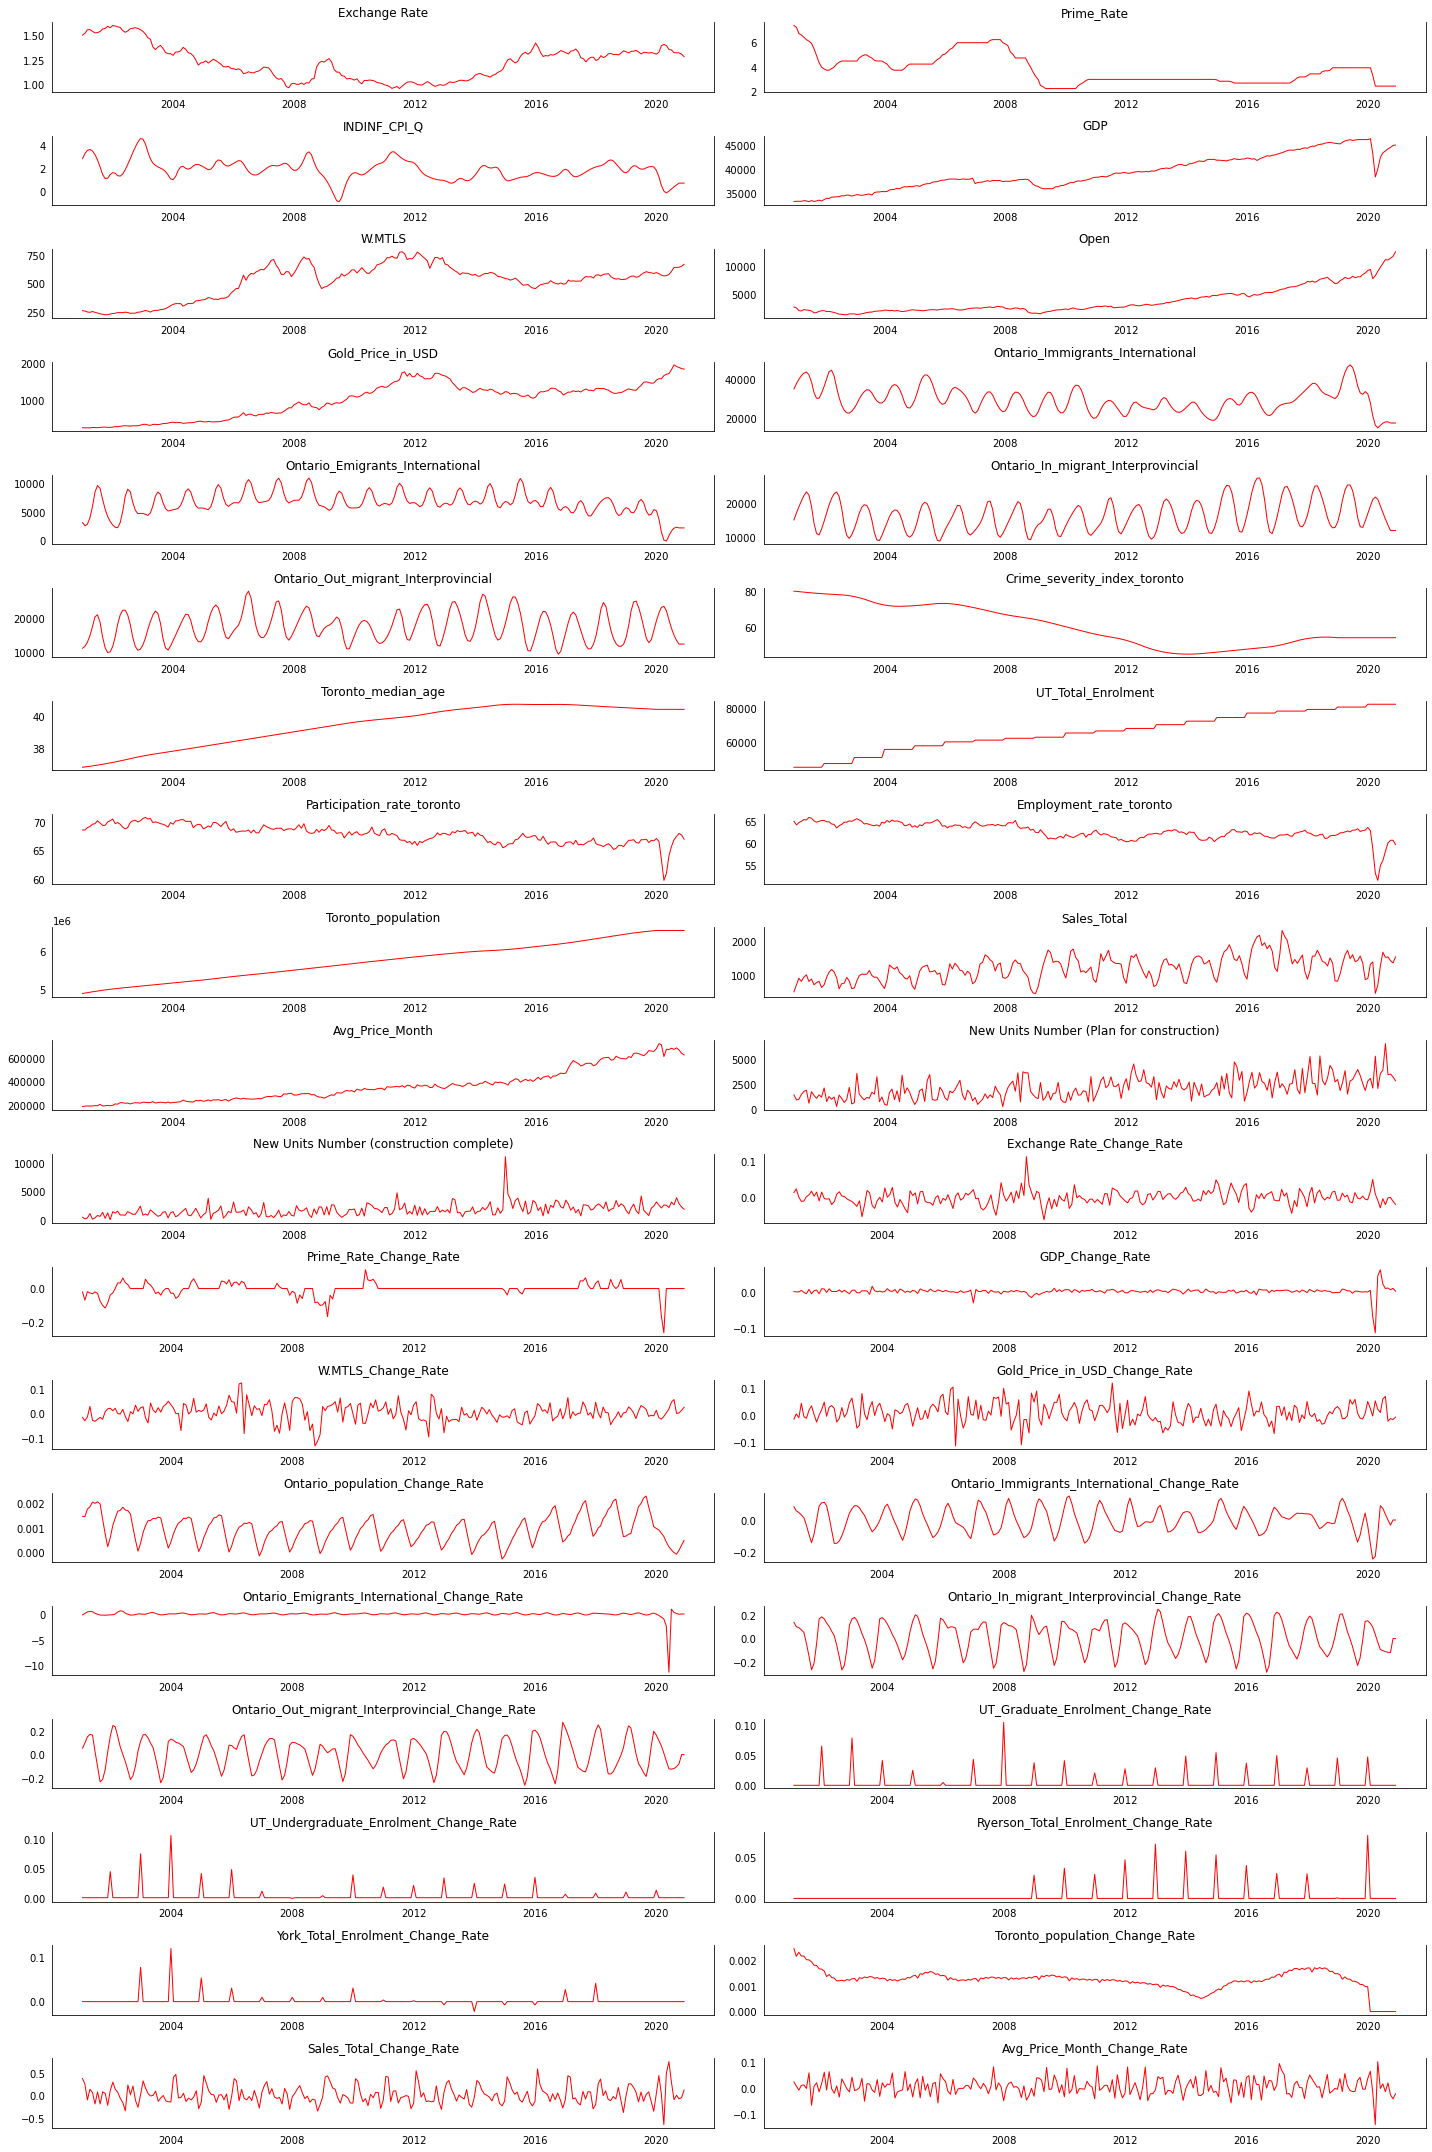

In [4]:
# Plot
fig, axes = plt.subplots(nrows=19, ncols=2, figsize=(20,30))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)

plt.tight_layout();

In [5]:
for col in df.columns:
    if "Change_Rate" in col:
        df.drop(columns=[col], inplace=True)

In [6]:
df

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,...,Crime_severity_index_toronto,Toronto_median_age,UT_Total_Enrolment,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete)
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.502559,7.400,2.800000,33393.91068,262.1820,2641.687163,265.296667,34801.00000,3144.000000,15176.00000,...,80.040000,36.800000,45261,68.6,65.0,4882618.000,528,185757.6686,1457,511
2001-02-01,1.521981,7.250,3.274302,33414.60595,258.2500,2474.819966,261.310800,37662.09142,2596.931225,17272.33196,...,79.883354,36.820147,45261,68.6,64.2,4894687.054,732,189990.7036,946,227
2001-03-01,1.557832,6.750,3.523191,33421.15412,250.7975,1999.363187,262.573929,39796.62476,2862.309003,19017.66529,...,79.746533,36.839195,45261,69.0,64.7,4905287.460,925,191476.2205,1015,387
2001-04-01,1.558629,6.625,3.600000,33411.95797,247.6000,1929.581512,260.073810,41662.00000,3997.000000,20786.00000,...,79.600220,36.861226,45261,69.2,65.0,4916690.735,836,189802.6914,1503,1151
2001-05-01,1.541287,6.450,3.475476,33549.86515,254.8020,2178.740467,271.755600,42969.07156,5936.427697,22333.20337,...,79.463797,36.883489,45261,69.6,65.4,4927393.091,958,191658.3372,1810,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,1.323456,2.450,0.380368,43904.52149,641.6550,11188.406810,1966.617619,17844.25527,2164.615160,15412.26311,...,54.180000,40.400000,82311,66.9,58.2,6555205.000,1536,673173.9453,6618,2689
2020-09-01,1.321741,2.450,0.548652,44363.54588,642.2860,11119.767620,1922.101364,17850.99984,2346.044135,13622.70035,...,54.180000,40.400000,82311,67.5,60.1,6555205.000,1549,686191.4216,3490,3922
2020-10-01,1.321338,2.450,0.700000,44628.00813,644.0925,11455.091750,1897.330909,17281.00000,2212.000000,12011.00000,...,54.180000,40.400000,82311,68.0,60.7,6555205.000,1438,668160.6273,3550,2872


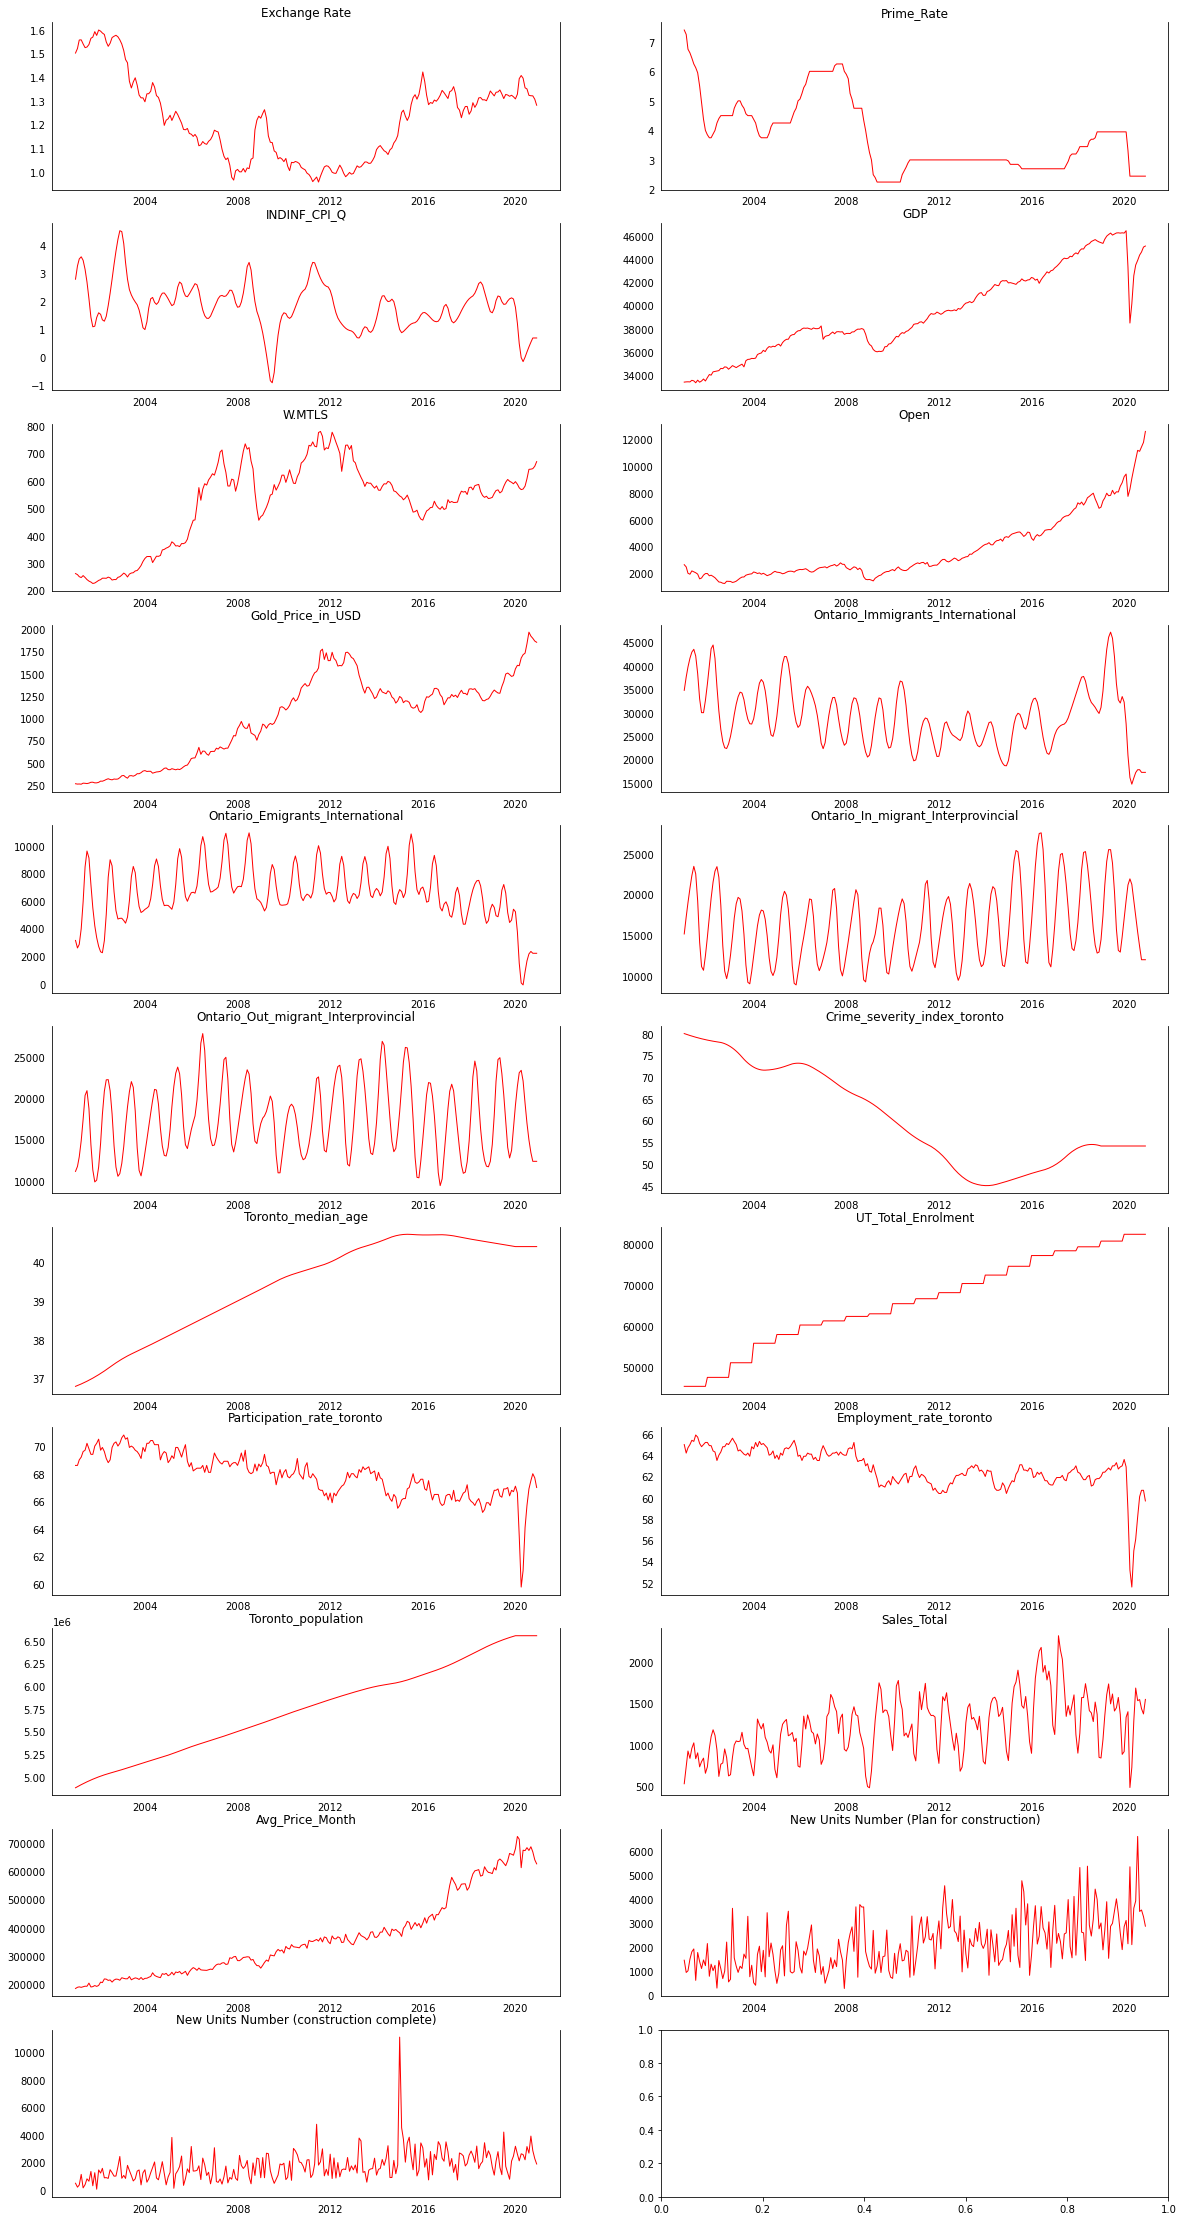

In [7]:
try:
    # Plot
    fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(20,40))
    for i, ax in enumerate(axes.flatten()):
        data = df[df.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
    #     ax.tick_params(labelsize=6)

    plt.tight_layout();
    
except:
    pass


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
df_target = pd.DataFrame()
df_target["Avg_Price_Month"] = df["Avg_Price_Month"]
df.drop(columns = ["Avg_Price_Month"], inplace=True)

In [10]:
df_scaled = StandardScaler().fit_transform(df)
print(df_scaled[0:5])

[[ 1.60209007  3.0185661   1.14651927 -1.6411796  -1.71363835 -0.47445131
  -1.57019265  0.88529165 -1.71577855 -0.2734137  -1.47920439  1.74121048
  -2.12436066 -1.92170243  0.45061462  1.19603653 -1.7817056  -1.98243207
  -0.62422367 -1.16552164]
 [ 1.71360472  2.8934078   1.70279558 -1.63549048 -1.73991673 -0.54354223
  -1.57863375  1.33389865 -1.99206653  0.20124125 -1.33814312  1.72723359
  -2.10795313 -1.92170243  0.45061462  0.76927754 -1.75684952 -1.40360943
  -1.0959019  -1.42767429]
 [ 1.91945247  2.47621347  1.99470032 -1.63369039 -1.78972336 -0.74040384
  -1.57595875  1.66858442 -1.8580419   0.59642251 -1.06854537  1.71502571
  -2.09244055 -1.92170243  0.7055292   1.03600191 -1.73501811 -0.85599782
  -1.03221149 -1.27998265]
 [ 1.92402977  2.37191489  2.08478453 -1.63621841 -1.81109292 -0.76929675
  -1.5812534   1.96106734 -1.2849851   0.99681178 -0.61264021  1.70197084
  -2.0744988  -1.92170243  0.83298648  1.19603653 -1.7115332  -1.10852338
  -0.5817634  -0.57475508]
 [ 1

In [11]:
pca = PCA(n_components=8)

In [12]:
df_pca = pca.fit_transform(df_scaled)

In [13]:
df_pca_fit = pd.DataFrame(data = df_pca)
df_pca_fit.head()

,0,1,2,3,4,5,6,7
0,-5.995473,-1.457377,2.213090,-0.986502,-0.767450,1.394472,-0.552513,-0.190509
1,-5.984885,-0.896203,2.495331,-0.896436,-1.133878,1.308984,-0.909047,0.609966
2,-6.011056,-0.160093,2.638671,-0.829568,-0.942014,0.902376,-0.604633,0.994382
3,-5.933847,0.577101,2.627061,-0.859382,-0.158020,1.157465,-0.169629,0.725789
4,-5.964933,1.646902,2.218033,-0.835376,-0.852002,0.786618,0.192648,0.564942


In [14]:
pca.explained_variance_ratio_

array([0.48395445, 0.12922603, 0.110861  , 0.05992958, 0.04108381,
       0.03836158, 0.03103975, 0.02815543])

In [15]:
df_target["Avg_Price_Month"]

Date
2001-01-01    185757.6686
2001-02-01    189990.7036
2001-03-01    191476.2205
2001-04-01    189802.6914
2001-05-01    191658.3372
                 ...     
2020-08-01    673173.9453
2020-09-01    686191.4216
2020-10-01    668160.6273
2020-11-01    640207.7862
2020-12-01    625828.1154
Name: Avg_Price_Month, Length: 240, dtype: float64

In [16]:
df_pca_fit.index = df_target.index

In [17]:
df_pca_fit["Avg_Price_Month"] = df_target["Avg_Price_Month"]

In [18]:
df_pca_fit

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2001-01-01,-5.995473,-1.457377,2.213090,-0.986502,-0.767450,1.394472,-0.552513,-0.190509,185757.6686
2001-02-01,-5.984885,-0.896203,2.495331,-0.896436,-1.133878,1.308984,-0.909047,0.609966,189990.7036
2001-03-01,-6.011056,-0.160093,2.638671,-0.829568,-0.942014,0.902376,-0.604633,0.994382,191476.2205
2001-04-01,-5.933847,0.577101,2.627061,-0.859382,-0.158020,1.157465,-0.169629,0.725789,189802.6914
2001-05-01,-5.964933,1.646902,2.218033,-0.835376,-0.852002,0.786618,0.192648,0.564942,191658.3372
...,...,...,...,...,...,...,...,...,...
2020-08-01,5.864460,-2.262611,2.317107,0.029414,-0.954821,1.183775,2.634316,-1.071278,673173.9453
2020-09-01,5.070839,-2.530869,1.893096,0.129823,0.600460,-0.028218,0.244320,-0.654238,686191.4216
2020-10-01,4.693832,-2.938806,1.799427,-0.333093,-0.130287,-0.345663,0.272129,-0.718229,668160.6273


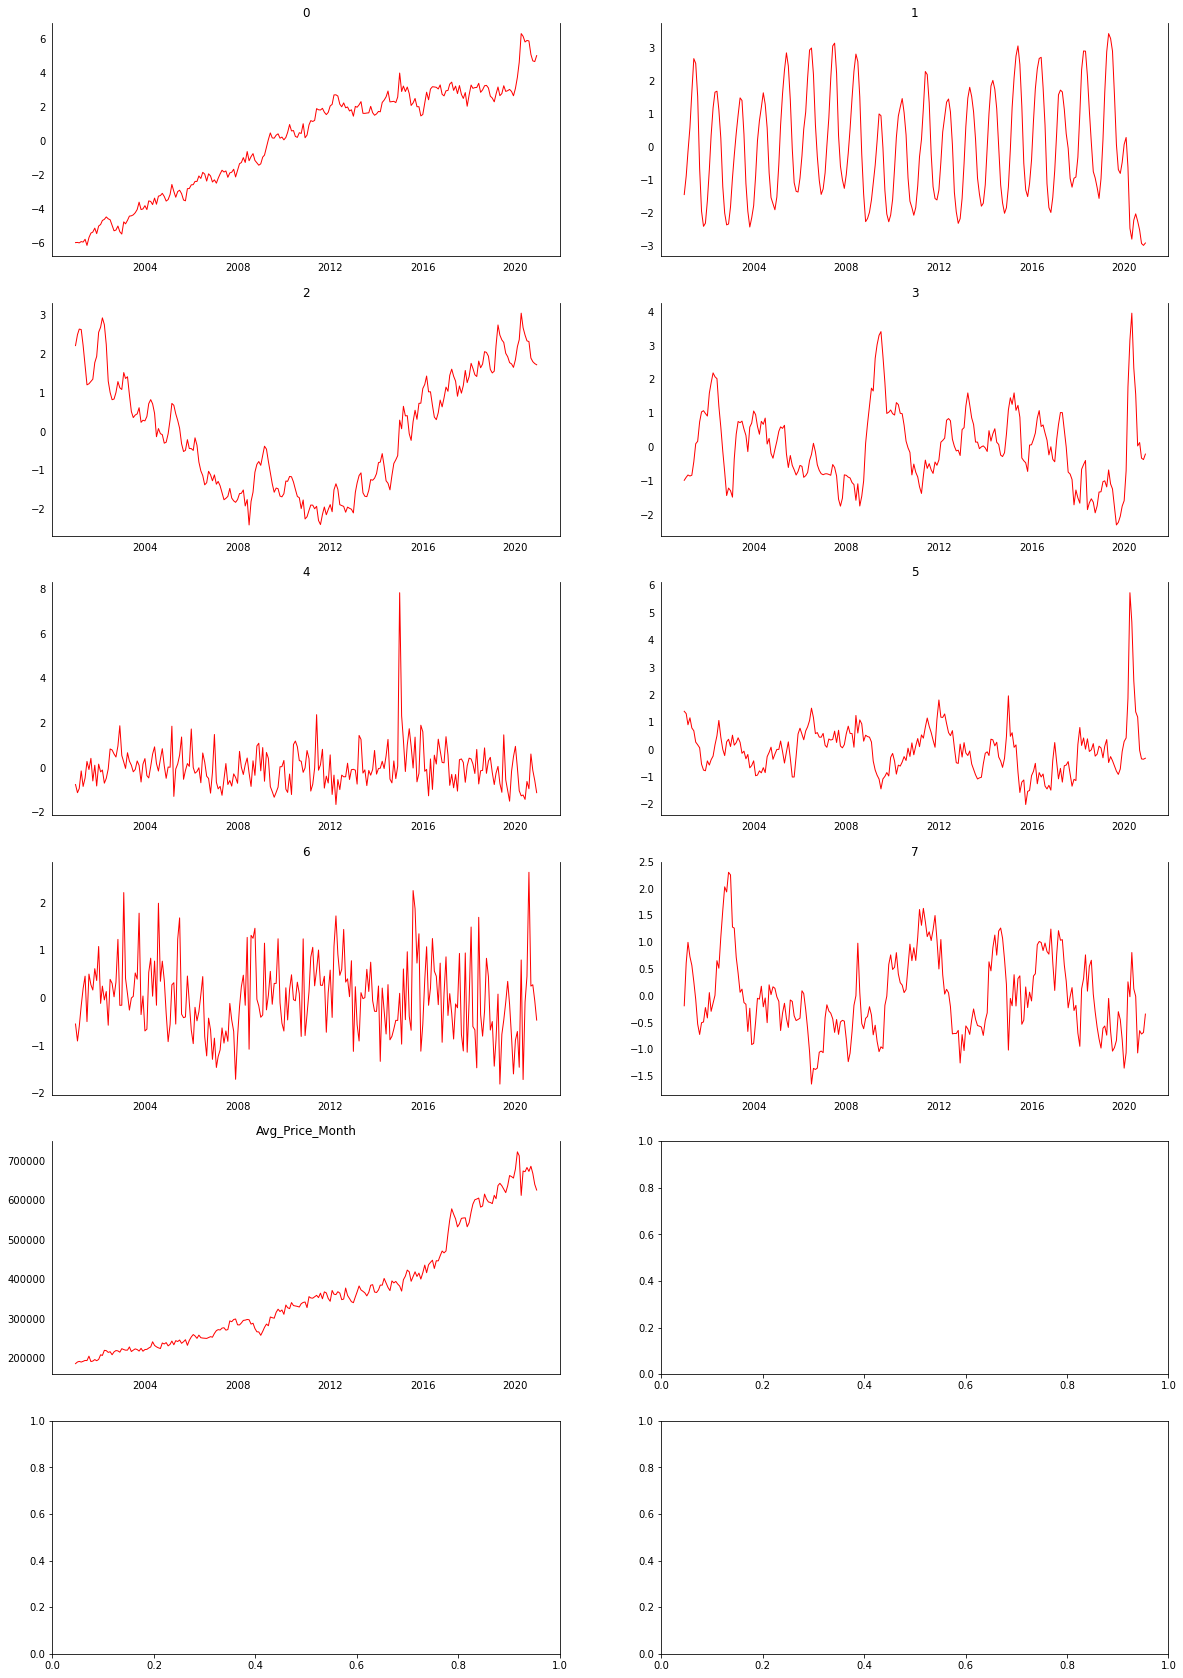

In [19]:
try:
    # Plot
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,30))
    for i, ax in enumerate(axes.flatten()):
        data = df_pca_fit[df_pca_fit.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(df_pca_fit.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
    #     ax.tick_params(labelsize=6)

    plt.tight_layout();
except:
    pass

In [20]:
df = df_pca_fit.copy()

In [21]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [str(var) + '_x' for var in variables]
    df.index = [str(var) + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)    

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,Avg_Price_Month_x
0_y,1.0000,0.0000,0.0006,0.0000,0.0006,0.0009,0.0000,0.0000,0.0409
1_y,0.0017,1.0000,0.0000,0.0001,0.0011,0.0005,0.0006,0.1243,0.0280
2_y,0.0000,0.0000,1.0000,0.0001,0.0005,0.0000,0.0000,0.0000,0.0139
3_y,0.0000,0.0002,0.0000,1.0000,0.2400,0.0000,0.0000,0.0000,0.0054
4_y,0.0448,0.1756,0.1861,0.1846,1.0000,0.0773,0.2432,0.0413,0.0633
5_y,0.0003,0.0017,0.0000,0.0000,0.0008,1.0000,0.0000,0.0000,0.0001
6_y,0.0024,0.0051,0.0719,0.0004,0.0646,0.0001,1.0000,0.0001,0.1316
7_y,0.0000,0.1165,0.0000,0.0001,0.0001,0.0000,0.0000,1.0000,0.1621
Avg_Price_Month_y,0.0757,0.0001,0.0518,0.0255,0.0661,0.0001,0.1588,0.3313,1.0000


In [22]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
0      ::  289.85    > 179.5199  =>   True
1      ::  217.61    > 143.6691  =>   True
2      ::  158.88    > 111.7797  =>   True
3      ::  111.05    > 83.9383   =>   True
4      ::  70.8      > 60.0627   =>   True
5      ::  42.99     > 40.1749   =>   True
6      ::  15.81     > 24.2761   =>   False
7      ::  5.6       > 12.3212   =>   False
Avg_Price_Month ::  0.69      > 4.1296    =>   False


In [23]:
nobs = 72
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape) 
print(df_test.shape)  

(168, 9)
(72, 9)


In [24]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [25]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.9828
 No. Lags Chosen       = 1
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.7595. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3711
 No. Lags Chosen       = 14
 Critical value 1%     = -3.474
 Critical value 5%     = -2.881
 Critical value 10%    = -2.577
 => P-Value = 0.1501. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-S

In [26]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [27]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -15.7459
 No. Lags Chosen       = 0
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.6632
 No. Lags Chosen       = 13
 Critical value 1%     = -3.474
 Critical value 5%     = -2.881
 Critical value 10%    = -2.577
 => P-Value = 0.0047. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test

In [28]:
# # Second Differencing
# df_differenced = df_differenced.diff().dropna()

In [29]:
# # ADF Test on each column of 2nd Differences Dataframe
# for name, column in df_differenced.iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [30]:
df_differenced

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2001-02-01,0.010588,0.561173,0.282242,0.090067,-0.366428,-0.085487,-0.356534,0.800475,4233.0350
2001-03-01,-0.026171,0.736110,0.143340,0.066868,0.191864,-0.406608,0.304414,0.384416,1485.5169
2001-04-01,0.077209,0.737195,-0.011611,-0.029814,0.783994,0.255088,0.435004,-0.268592,-1673.5291
2001-05-01,-0.031086,1.069801,-0.409028,0.024005,-0.693982,-0.370847,0.362277,-0.160848,1855.6458
2001-06-01,0.166073,1.012895,-0.514937,0.398204,0.376882,-0.103875,0.260135,-0.304509,2242.0114
...,...,...,...,...,...,...,...,...,...
2014-08-01,-0.639172,-1.157691,-0.168848,-0.066095,-1.774883,-0.538898,-1.158614,0.450158,-8102.8785
2014-09-01,0.018843,-1.146154,0.369960,-0.314264,-0.171984,-0.147088,0.072729,0.056846,24606.1146
2014-10-01,0.013968,-0.549464,0.309189,-0.043222,0.983649,-0.232041,0.154329,-0.190608,-5075.6451


In [31]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -1.5155965127873499
BIC :  0.1716257821047522
FPE :  0.21996606993606543
HQIC:  -0.8307416990187788 

Lag Order = 2
AIC :  -3.787187388212901
BIC :  -0.5682984425341173
FPE :  0.02286947017943413
HQIC:  -2.4805284254415265 

Lag Order = 3
AIC :  -4.006513408003284
BIC :  0.7566959810924363
FPE :  0.018758284895110118
HQIC:  -2.072830287409655 

Lag Order = 4
AIC :  -3.834234757171359
BIC :  2.4861260825136213
FPE :  0.02324174668280106
HQIC:  -1.2682375257120864 

Lag Order = 5
AIC :  -4.335012589329992
BIC :  3.5555113784861003
FPE :  0.015137310283149677
HQIC:  -1.1313401039926756 

Lag Order = 6
AIC :  -4.277465473811722
BIC :  5.196417511699517
FPE :  0.01795332445761304
HQIC:  -0.43068412938051637 

Lag Order = 7
AIC :  -4.557606879238651
BIC :  6.513018855603125
FPE :  0.016051930829250247
HQIC:  -0.062209308969343624 

Lag Order = 8
AIC :  -5.381048621507841
BIC :  7.299895157477643
FPE :  0.008971621175483923
HQIC:  -0.23145237010012032 

Lag Order = 9
AIC 

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [32]:
x = model.select_order(maxlags=15)
x.summary()

,AIC,BIC,FPE,HQIC
0,1.935,2.114,6.924,2.008
1,-1.540,0.2509,0.2148,-0.8122
2,-3.858,-0.4562*,0.02136,-2.476
3,-4.196,0.8177,0.01565,-2.159
4,-4.096,2.529,0.01820,-1.405
5,-4.531,3.705,0.01284,-1.185
6,-4.473,5.374,0.01554,-0.4728
7,-4.879,6.580,0.01257,-0.2238
8,-5.507,7.563,0.008809,-0.1974
9,-5.633,9.049,0.01131,0.3312


In [33]:
model_fitted = model.fit(7)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 02, Jun, 2021
Time:                     23:12:54
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    6.51302
Nobs:                     160.000    HQIC:                -0.0622093
Log likelihood:          -1102.66    FPE:                  0.0160519
AIC:                     -4.55761    Det(Omega_mle):     0.000776918
--------------------------------------------------------------------
Results for equation 0
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.075002         0.033621            2.231           0.026
L1.0                       0.100980         0.194200            0.520           0.603
L1.1                      -0.142197         

In [34]:
def adjust(val, length= 6): return str(val).ljust(length)

In [35]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

0      : 1.97
1      : 2.06
2      : 2.08
3      : 2.03
4      : 2.07
5      : 2.07
6      : 1.97
7      : 2.01
Avg_Price_Month : 2.02


In [36]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

7


array([[ 1.93785519e-01, -2.69044949e-01, -3.80306787e-01,
         1.48348029e-01,  5.67936847e-01, -2.19578543e-01,
        -4.86320707e-01,  2.39252334e-01, -1.12405382e+04],
       [ 3.42019323e-01, -5.89684995e-01, -6.42760854e-02,
        -3.97564394e-01,  7.36092183e-01,  1.33196947e-01,
         1.03733690e+00, -3.75006270e-01, -1.15665917e+04],
       [-6.39171511e-01, -1.15769141e+00, -1.68848043e-01,
        -6.60948074e-02, -1.77488349e+00, -5.38897772e-01,
        -1.15861377e+00,  4.50157759e-01, -8.10287850e+03],
       [ 1.88425459e-02, -1.14615368e+00,  3.69959865e-01,
        -3.14263674e-01, -1.71983504e-01, -1.47088167e-01,
         7.27292644e-02,  5.68462379e-02,  2.46061146e+04],
       [ 1.39675166e-02, -5.49464391e-01,  3.09189460e-01,
        -4.32216821e-02,  9.83648889e-01, -2.32040511e-01,
         1.54329175e-01, -1.90608253e-01, -5.07564510e+03],
       [-7.43732442e-02, -3.12440392e-01,  9.49262937e-02,
         1.13237105e-01, -7.92473429e-01,  3.321028

In [37]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns)
df_forecast

,0,1,2,3,4,5,6,7,Avg_Price_Month
Date,,,,,,,,,
2015-01-01,0.056732,0.747214,-0.182703,0.839935,-0.024603,-0.104484,-1.130216,0.033392,-4589.416681
2015-02-01,0.453132,1.305920,0.274147,0.227671,0.087895,0.109849,0.991191,-0.437604,5936.884370
2015-03-01,-0.006435,1.111020,-0.102801,0.334812,-1.351807,-0.449101,-0.299357,0.251142,7111.728103
2015-04-01,0.104179,0.643549,-0.035505,0.057824,0.713884,-0.046536,0.023891,-0.041910,-4165.841138
2015-05-01,0.201815,0.174822,-0.182619,-0.187048,0.578787,0.153191,0.350239,0.004138,5090.213938
...,...,...,...,...,...,...,...,...,...
2020-08-01,-0.029466,-0.935809,0.022309,-0.164279,-0.022873,-0.048742,-0.075524,0.031484,256.522333
2020-09-01,0.002137,-0.650912,0.085537,-0.062856,0.003018,-0.009715,-0.113805,0.034635,755.892692
2020-10-01,0.036773,-0.168219,0.105475,0.056682,0.019992,0.048073,-0.121974,0.021744,1018.871894


In [38]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[col].cumsum()
    return df_fc

In [39]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)        
df_results

,0,1,2,3,4,5,6,7,Avg_Price_Month,0_forecast,1_forecast,2_forecast,3_forecast,4_forecast,5_forecast,6_forecast,7_forecast,Avg_Price_Month_forecast
Date,,,,,,,,,,,,,,,,,,
2015-01-01,0.056732,0.747214,-0.182703,0.839935,-0.024603,-0.104484,-1.130216,0.033392,-4589.416681,2.620955,-1.108476,-0.806094,1.212889,0.033119,0.362647,-1.607350,0.242545,383022.169919
2015-02-01,0.453132,1.305920,0.274147,0.227671,0.087895,0.109849,0.991191,-0.437604,5936.884370,3.074087,0.197444,-0.531947,1.440560,0.121014,0.472497,-0.616160,-0.195059,388959.054289
2015-03-01,-0.006435,1.111020,-0.102801,0.334812,-1.351807,-0.449101,-0.299357,0.251142,7111.728103,3.067652,1.308464,-0.634748,1.775373,-1.230793,0.023396,-0.915517,0.056083,396070.782393
2015-04-01,0.104179,0.643549,-0.035505,0.057824,0.713884,-0.046536,0.023891,-0.041910,-4165.841138,3.171831,1.952013,-0.670253,1.833197,-0.516909,-0.023140,-0.891626,0.014172,391904.941254
2015-05-01,0.201815,0.174822,-0.182619,-0.187048,0.578787,0.153191,0.350239,0.004138,5090.213938,3.373646,2.126835,-0.852872,1.646149,0.061878,0.130051,-0.541387,0.018310,396995.155192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-0.029466,-0.935809,0.022309,-0.164279,-0.022873,-0.048742,-0.075524,0.031484,256.522333,6.212297,-0.891316,-2.362048,1.038393,-0.170247,-0.236778,-1.052854,0.191400,466809.936090
2020-09-01,0.002137,-0.650912,0.085537,-0.062856,0.003018,-0.009715,-0.113805,0.034635,755.892692,6.214434,-1.542228,-2.276511,0.975537,-0.167229,-0.246493,-1.166659,0.226035,467565.828783
2020-10-01,0.036773,-0.168219,0.105475,0.056682,0.019992,0.048073,-0.121974,0.021744,1018.871894,6.251207,-1.710447,-2.171036,1.032219,-0.147237,-0.198420,-1.288633,0.247779,468584.700677


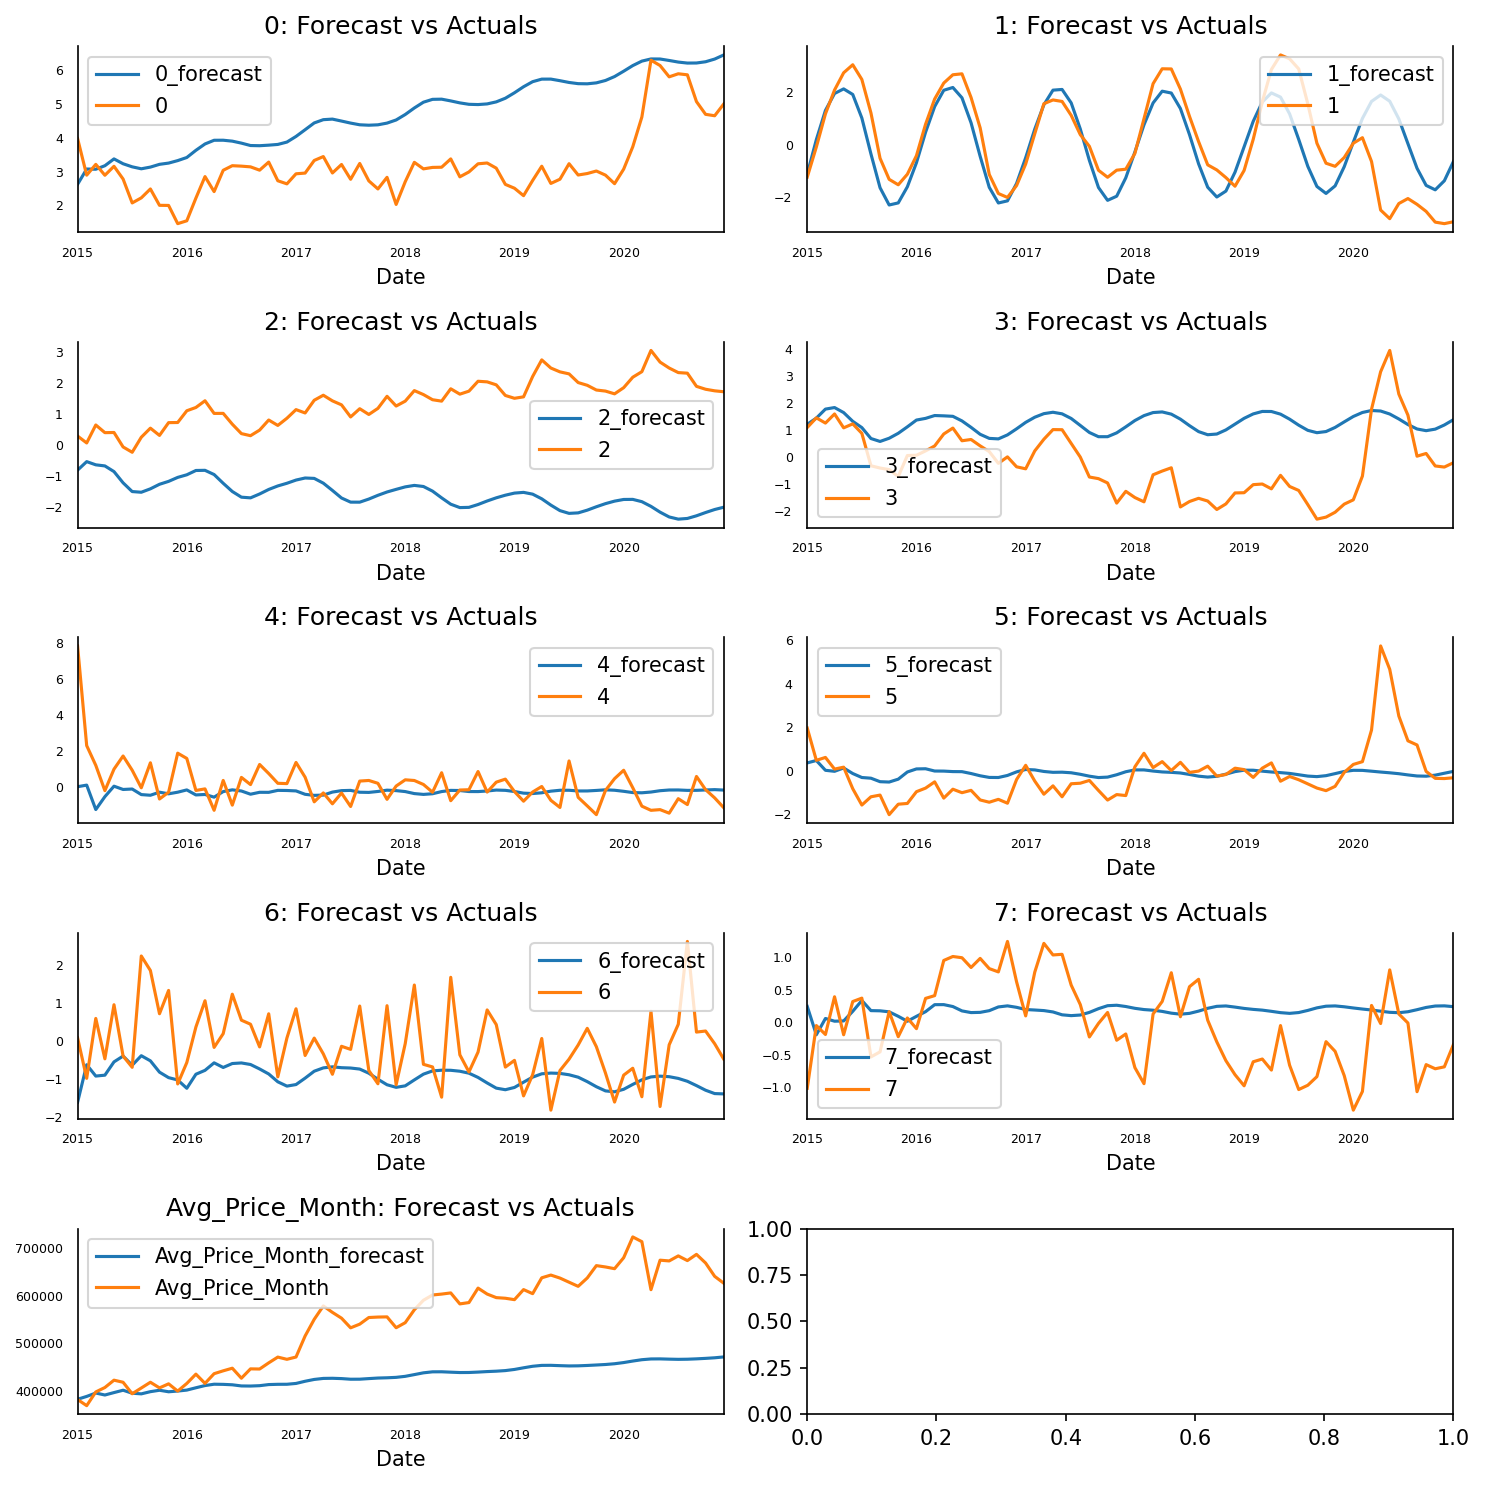

In [40]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2+1), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[str(col)+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(str(col) + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();